In [1]:
#importing important libraries
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import numpy

Using TensorFlow backend.
/Users/haru/anaconda3/envs/experiment/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [2]:
#load and see first five rows of datasets
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 表の見方
 - 妊娠した回数、グルコース、血圧(mm HG)、皮膚の厚さ、インスリン、BMI、Diabetes pedigree function（血統？）、年齢、ラベル

In [9]:
#データとラベルに分割する
X = df.drop(8, axis = 1)
y = df[8]
X

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [12]:
#平均を0にし、標準偏差を1に設定、正規化する
from sklearn.preprocessing import scale
X = scale(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
#訓練用とテスト用にデータを分割,20%をテスト用にする
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [18]:
#ワンホットベクトルへの変換
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(614, 2)
(154, 2)


In [19]:
#12のニューロンを持つ入力層、8のニューロンを持つ隠れ層、２つのニューロンを持つ出力層を持つネットワークを構成する
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
# モデルをコンパイルする
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 学習を行う、バリデーションの割合は10%
hist = model.fit(X_train, y_train, epochs=150, batch_size=10,validation_split=0.1)

Train on 552 samples, validate on 62 samples
Epoch 1/150
552/552 [==============================] - 0s 165us/step - loss: 0.3691 - acc: 0.8351 - val_loss: 0.3800 - val_acc: 0.8145
Epoch 2/150
552/552 [==============================] - 0s 169us/step - loss: 0.3639 - acc: 0.8397 - val_loss: 0.3828 - val_acc: 0.8145
Epoch 3/150
552/552 [==============================] - 0s 132us/step - loss: 0.3648 - acc: 0.8433 - val_loss: 0.3890 - val_acc: 0.8065
Epoch 4/150
552/552 [==============================] - 0s 128us/step - loss: 0.3629 - acc: 0.8433 - val_loss: 0.3905 - val_acc: 0.8065
Epoch 5/150
552/552 [==============================] - 0s 131us/step - loss: 0.3647 - acc: 0.8415 - val_loss: 0.3968 - val_acc: 0.8145
Epoch 6/150
552/552 [==============================] - 0s 131us/step - loss: 0.3612 - acc: 0.8433 - val_loss: 0.3970 - val_acc: 0.8065
Epoch 7/150
552/552 [==============================] - 0s 132us/step - loss: 0.3605 - acc: 0.8460 - val_loss: 0.4030 - val_acc: 0.8145
Epoch 8/15

Epoch 61/150
552/552 [==============================] - 0s 120us/step - loss: 0.3342 - acc: 0.8578 - val_loss: 0.4640 - val_acc: 0.8306
Epoch 62/150
552/552 [==============================] - 0s 118us/step - loss: 0.3330 - acc: 0.8533 - val_loss: 0.4656 - val_acc: 0.8306
Epoch 63/150
552/552 [==============================] - 0s 122us/step - loss: 0.3345 - acc: 0.8524 - val_loss: 0.4656 - val_acc: 0.8306
Epoch 64/150
552/552 [==============================] - 0s 120us/step - loss: 0.3316 - acc: 0.8596 - val_loss: 0.4642 - val_acc: 0.8226
Epoch 65/150
552/552 [==============================] - 0s 118us/step - loss: 0.3317 - acc: 0.8551 - val_loss: 0.4656 - val_acc: 0.8226
Epoch 66/150
552/552 [==============================] - 0s 120us/step - loss: 0.3317 - acc: 0.8569 - val_loss: 0.4685 - val_acc: 0.8306
Epoch 67/150
552/552 [==============================] - 0s 121us/step - loss: 0.3308 - acc: 0.8578 - val_loss: 0.4667 - val_acc: 0.8306
Epoch 68/150
552/552 [==========================

552/552 [==============================] - 0s 119us/step - loss: 0.3139 - acc: 0.8632 - val_loss: 0.4973 - val_acc: 0.8145
Epoch 122/150
552/552 [==============================] - 0s 123us/step - loss: 0.3130 - acc: 0.8678 - val_loss: 0.4974 - val_acc: 0.8226
Epoch 123/150
552/552 [==============================] - 0s 120us/step - loss: 0.3129 - acc: 0.8659 - val_loss: 0.4925 - val_acc: 0.7984
Epoch 124/150
552/552 [==============================] - 0s 124us/step - loss: 0.3105 - acc: 0.8741 - val_loss: 0.4945 - val_acc: 0.8145
Epoch 125/150
552/552 [==============================] - 0s 108us/step - loss: 0.3116 - acc: 0.8668 - val_loss: 0.4965 - val_acc: 0.8226
Epoch 126/150
552/552 [==============================] - 0s 111us/step - loss: 0.3106 - acc: 0.8678 - val_loss: 0.4945 - val_acc: 0.8145
Epoch 127/150
552/552 [==============================] - 0s 104us/step - loss: 0.3100 - acc: 0.8714 - val_loss: 0.5012 - val_acc: 0.8226
Epoch 128/150
552/552 [==============================] 

In [27]:
score = model.evaluate(X_test,y_test,verbose=0)
print('test loss:',score[0])
print('test acc:',score[1])

test loss: 0.7271241777903074
test acc: 0.7305194781972216


<function matplotlib.pyplot.show(*args, **kw)>

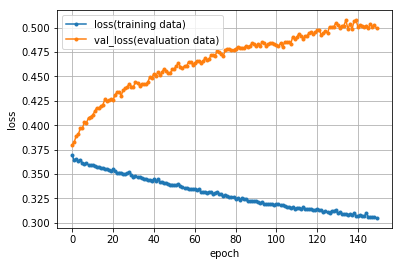

In [28]:
#ロスをエポックごとにプロットする
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = len(loss)
 
plt.plot(range(epochs),loss,marker='.',label='loss(training data)')
plt.plot(range(epochs),val_loss,marker='.', label='val_loss(evaluation data)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show